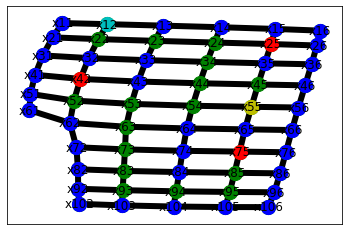

In [21]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import math
import heapq

class Graph(object):
    def __init__(self, graph_dict=None):
        """ initializes a graph object 
            If no dictionary or None is given, 
            an empty dictionary will be used
        """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns the vertices of a graph """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns the edges of a graph """
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in 
            self.__graph_dict, a key "vertex" with an empty
            list as a value is added to the dictionary. 
            Otherwise nothing has to be done. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ assumes that edge is of type set, tuple or list; 
            between two vertices can be multiple edges! 
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        """ A static method generating the edges of the 
            graph "graph". Edges are represented as sets 
            with one (a loop back to the vertex) or two 
            vertices 
        """
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges

    #nuevos metodos
    def find_path(self, start_vertex, end_vertex, path=None):
        """ find a path from start_vertex to end_vertex 
            in graph """
        if path == None:
            path = []
        graph = self.__graph_dict
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return path
        if start_vertex not in graph:
            return None
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_path = self.find_path(vertex, 
                                               end_vertex, 
                                               path)
                if extended_path: 
                    return extended_path
        return None

    def find_all_paths(self, start_vertex, end_vertex, path=[]):
        """ find all paths from start_vertex to 
            end_vertex in graph """
        graph = self.__graph_dict 
        path = path + [start_vertex]
        if start_vertex == end_vertex:
            return [path]
        if start_vertex not in graph:
            return []
        paths = []
        for vertex in graph[start_vertex]:
            if vertex not in path:
                extended_paths = self.find_all_paths(vertex, 
                                                     end_vertex, 
                                                     path)
                for p in extended_paths: 
                    paths.append(p)
        return paths

    def vertex_degree(self, vertex):
        """ The degree of a vertex is the number of edges connecting
            it, i.e. the number of adjacent vertices. Loops are counted 
            double, i.e. every occurence of vertex in the list 
            of adjacent vertices. """ 
        adj_vertices =  self.__graph_dict[vertex]
        degree = len(adj_vertices) + adj_vertices.count(vertex)
        return degree

    def find_isolated_vertices(self):
        """ returns a list of isolated vertices. """
        graph = self.__graph_dict
        isolated = []
        for vertex in graph:
            print(isolated, vertex)
            if not graph[vertex]:
                isolated += [vertex]
        return isolated

    def delta(self):
        """ the minimum degree of the vertices """
        min = 100000000
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree < min:
                min = vertex_degree
        return min
        
    def Delta(self):
        """ the maximum degree of the vertices """
        max = 0
        for vertex in self.__graph_dict:
            vertex_degree = self.vertex_degree(vertex)
            if vertex_degree > max:
                max = vertex_degree
        return max

    def degree_sequence(self):
        """ calculates the degree sequence """
        seq = []
        for vertex in self.__graph_dict:
            seq.append(self.vertex_degree(vertex))
        seq.sort(reverse=True)
        return tuple(seq)
    
    def is_connected(self, 
                     vertices_encountered = None, 
                     start_vertex=None):
        """ determines if the graph is connected """
        if vertices_encountered is None:
            vertices_encountered = set()
        gdict = self.__graph_dict        
        vertices = list(gdict.keys()) # "list" necessary in Python 3 
        if not start_vertex:
            # chosse a vertex from graph as a starting point
            start_vertex = vertices[0]
        vertices_encountered.add(start_vertex)
        if len(vertices_encountered) != len(vertices):
            for vertex in gdict[start_vertex]:
                if vertex not in vertices_encountered:
                    if self.is_connected(vertices_encountered, vertex):
                        return True
        else:
            return True
        return False

    def density(self):
        """ method to calculate the density of a graph """
        g = self.__graph_dict
        V = len(g.keys())
        E = len(self.edges())
        return 2.0 * E / (V *(V - 1))

    def diameter(self):
        """ calculates the diameter of the graph """
        
        v = self.vertices() 
        pairs = [ (v[i],v[j]) for i in range(len(v)) for j in range(i+1, len(v)-1)]
        smallest_paths = []
        for (s,e) in pairs:
            paths = self.find_all_paths(s,e)
            smallest = sorted(paths, key=len)[0]
            smallest_paths.append(smallest)

        smallest_paths.sort(key=len)

        # longest path is at the end of list, 
        # i.e. diameter corresponds to the length of this path
        diameter = len(smallest_paths[-1]) - 1
        return diameter

    def __str__(self):
        res = "vertices: "
        for k in self.__graph_dict:
            res += str(k) + " "
        res += "\nedges: "
        for edge in self.__generate_edges():
            res += str(edge) + " "
        return res

    
g = { "x11" : ["x12","x21"],
    "x12" : ["x11","x13","x22"],
    "x13" : ["x12","x23","x14"],
    "x14" : ["x13","x24","x15"],
    "x15" : ["x14","x25","x16"],
    "x16" : ["x15","x26"],
    "x21" : ["x11","x22","x31"],
    "x22" : ["x12","x21","x32","x23"],
    "x23" : ["x22","x13","x24","x33"],
    "x24" : ["x14","x23","x34","x25"],
    "x25" : ["x15","x24","x35","x26"],
    "x26" : ["x16","x25","x36"],
    "x31" : ["x21","x32","x41"],
    "x32" : ["x31","x22","x42","x33"],
    "x33" : ["x32","x23","x43","x34"],
    "x34" : ["x33","x24","x44","x35"],
    "x35" : ["x34","x25","x45","x36"],
    "x36" : ["x35","x26","x46"],
    "x41" : ["x31","x42","x51"],
    "x42" : ["x41","x32","x43","x52"],
    "x43" : ["x42","x33","x44","x53"],
    "x44" : ["x43","x34","x45","x54"],
    "x45" : ["x44","x35","x46","x55"],
    "x46" : ["x45","x36","x56"],
    "x51" : ["x41","x61","x52"],
    "x52" : ["x51","x42","x62","x53"],
    "x53" : ["x52","x43","x63","x54"],
    "x54" : ["x53","x44","x64","x55"],
    "x55" : ["x54","x45","x65","x56"],
    "x56" : ["x55","x46","x66"],
    "x61" : ["x51","x62"],
    "x62" : ["x61","x52","x63"],
    "x63" : ["x62","x53","x64"],
    "x64" : ["x63","x54","x65"],
    "x65" : ["x64","x55","x66"],
    "x66" : ["x65","x56"],
    "x72" : ["x73","x62","x82"],
    "x73" : ["x72","x63","x74","x83"],
    "x74" : ["x73","x64","x84","x75"],
    "x75" : ["x74","x65","x85","x76"],
    "x76" : ["x75","x66","x86"],
    "x82" : ["x83","x72","x92"],
    "x83" : ["x73","x82","x93","x84"],
    "x84" : ["x74","x83","x94","x85"],
    "x85" : ["x75","x84","x95","x86"],
    "x86" : ["x76","x85","x96"],
    "x92" : ["x82","x102","x93"],
    "x93" : ["x92","x83","x103","x94"],
    "x94" : ["x93","x84","x104","x95"],
    "x95" : ["x94","x85","x105","x96"],
    "x96" : ["x95","x86","x106"],
    "x102" : ["x92","x103"],
    "x103" : ["x102","x93","x104"],
    "x104" : ["x103","x94","x105"],
    "x105" : ["x104","x95","x106"],
    "x106" : ["x105","x96"]
    }

graph = Graph(g)
G = nx.Graph(g)
    
pos = nx.spring_layout(G, iterations=100, seed=10)
nx.draw_networkx(G, pos, node_color="g", node_size=200, with_labels=True, width=6)
    
# nodes
options = {"node_size": 200, "alpha": 1}
nx.draw_networkx_nodes(G, pos, nodelist=["x25","x42","x75"], node_color="r", **options)
nx.draw_networkx_nodes(G, pos, nodelist=["x11","x13","x14","x15","x16","x32","x33","x35","x43",
                                         "x21","x31","x41","x51","x61","x26","x36","x46","x56","x66",
                                         "x62","x64","x65","x72","x82","x92","x102",
                                         "x74","x84","x103","x104","x105","x106","x96","x86","x76"], 
                                         node_color="b", **options)
    
nx.draw_networkx_nodes(G, pos, nodelist=["x55"], node_color="y", **options)
nx.draw_networkx_nodes(G, pos, nodelist=["x12"], node_color="c", **options)

In [22]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def return_path(current_node):
    path = []
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    return path[::-1]  # Return reversed path


def astar(grid, start, end):
    
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)
    
    # Adding a stop condition
    outer_iterations = 0
    max_iterations = 100

    # what squares do we search
    adjacent_squares = ((0, -1), (0, 1), (-1, 0), (1, 0),)

    # Loop until you find the end
    while len(open_list) > 0:
        outer_iterations += 1
        
        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            return return_path(current_node)

        # Generate children
        children = []
        
        for new_position in adjacent_squares:  # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            within_range_criteria = [
                node_position[0] > (len(grid) - 1),
                node_position[0] < 0,
                node_position[1] > (len(grid[len(grid) - 1]) - 1),
                node_position[1] < 0,
            ]
            
            if any(within_range_criteria):
                continue

            # Make sure walkable terrain
            if grid[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:
            
            # Child is on the closed list
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + \
                      ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            if len([open_node for open_node in open_list if child == open_node and child.g > open_node.g]) > 0:
                continue

            # Add the child to the open list
            open_list.append(child)

def hitman(start,end):
    grid = [[1, 0, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 1],
            [1, 1, 1, 0, 1, 1],
            [1, 0, 1, 0, 0, 1],
            [1, 0, 0, 0, 0, 1],
            [1, 1, 0, 1, 1, 1],
            [0, 1, 0, 1, 0, 1],
            [0, 1, 0, 1, 0, 1],
            [0, 1, 0, 0, 0, 1],
            [0, 1, 1, 1, 1, 1]]
   
    path = astar(grid, start, end)
    print(path)
    return (len(path))

enemies = [(6,4),(1,4),(3,1)]
start = (0,1)
exit = (4,4)  
c = 0

while len(enemies) > 0:
    d  = []
    print("Analizando posibles caminos: ")
    for x in enemies:
        b = hitman(start,x)-1
        d.append(b)  
    print("Se ha determinado el camino mas adecuado. ")
    f = min(d)
    c = f + c
    h = d.index(f)
    start = enemies[h]
    enemies.remove(enemies[h])
    
print("El camino para su escape es: ")
c = c + hitman(start,exit)-1
print("Los pasos totales que el personaje tomo fueron: ")
print(c)

Analizando posibles caminos: 
[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (7, 4), (6, 4)]
[(0, 1), (1, 1), (1, 2), (1, 3), (1, 4)]
[(0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (4, 1), (3, 1)]
Se ha determinado el camino mas adecuado. 
Analizando posibles caminos: 
[(1, 4), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (7, 4), (6, 4)]
[(1, 4), (1, 3), (2, 3), (3, 3), (4, 3), (4, 2), (4, 1), (3, 1)]
Se ha determinado el camino mas adecuado. 
Analizando posibles caminos: 
[(3, 1), (4, 1), (4, 2), (5, 2), (6, 2), (7, 2), (8, 2), (8, 3), (8, 4), (7, 4), (6, 4)]
Se ha determinado el camino mas adecuado. 
El camino para su escape es: 
[(6, 4), (7, 4), (8, 4), (8, 3), (8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (4, 3), (4, 4)]
Los pasos totales que el personaje tomo fueron: 
31
